Stats
              Cost         Size      Package         Core          GPU   
count  9000.000000  9000.000000  9000.000000  9000.000000  9000.000000  \
mean    627.755556   402.500000     0.547964     0.459664     0.001139   
std     227.805267   391.197845     1.207056     1.042498     0.003683   
min     237.000000    10.000000     0.023743     0.013855     0.000000   
25%     444.000000    77.500000     0.037292     0.020081     0.000000   
50%     608.000000   300.000000     0.158355     0.105438     0.000000   
75%     775.000000   625.000000     0.517776     0.421235     0.000000   
max    1285.000000  1000.000000    20.418640    17.145569     0.201721   

         DRAM         Time  Temperature        Memory  
count  9000.0  9000.000000  9000.000000   9000.000000  
mean      0.0    78.336889    39.714122  18248.109778  
std       0.0   148.727091     0.313481  18876.997896  
min       0.0     3.000000    39.000000   1280.000000  
25%       0.0    14.000000    39.700000   3452.

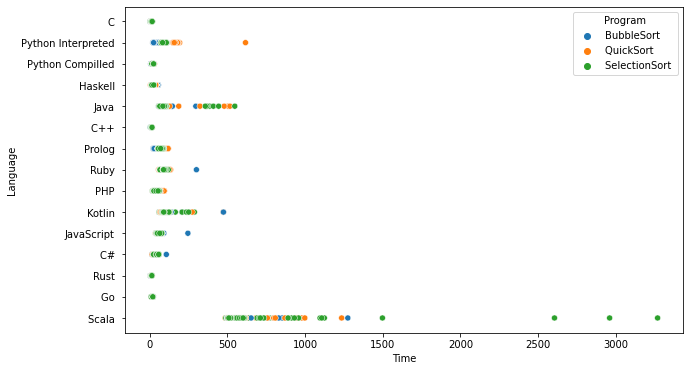

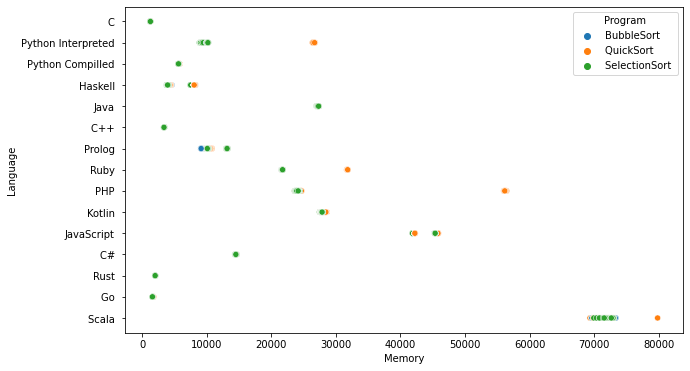

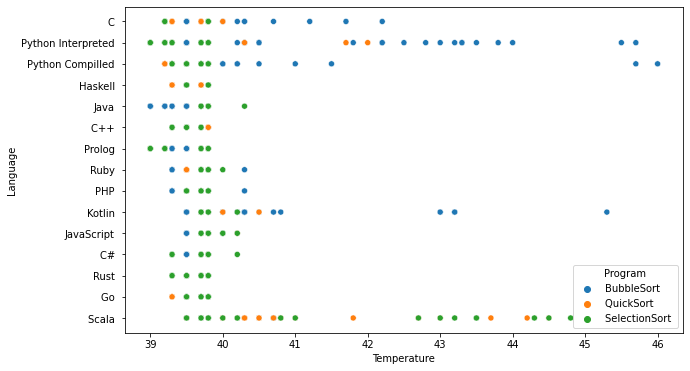

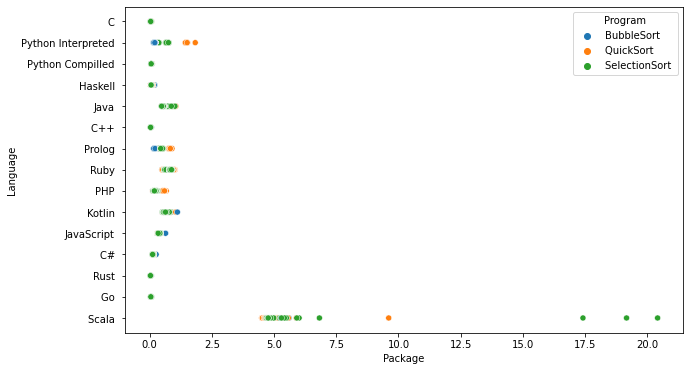

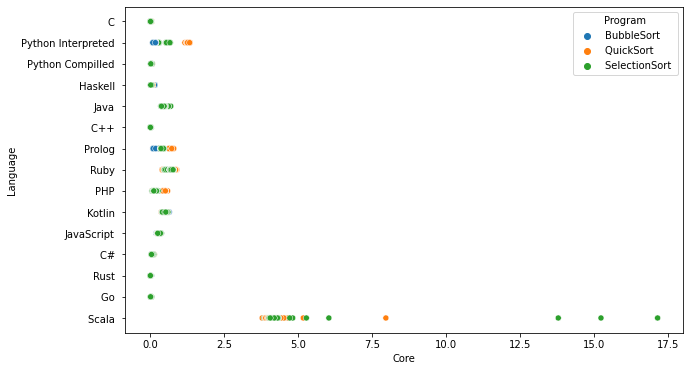

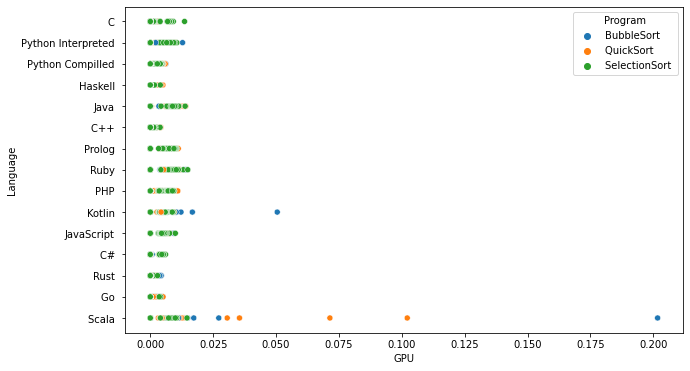

In [2]:
# estatísticas básicas
import seaborn as sea
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


file_name = '../measurements.csv'
df = pd.read_csv(file_name, header = 0, delimiter=",", decimal=".")
for col in ["Time", "Memory", "Temperature", "Package", "Core", "GPU"]:
    plt.figure(figsize=(10,6))
    sea.scatterplot(data=df,hue='Program',y='Language', x=col)

# estatísticas básicas (descritivas)
# summary stats
print("Stats")
print(df.describe())

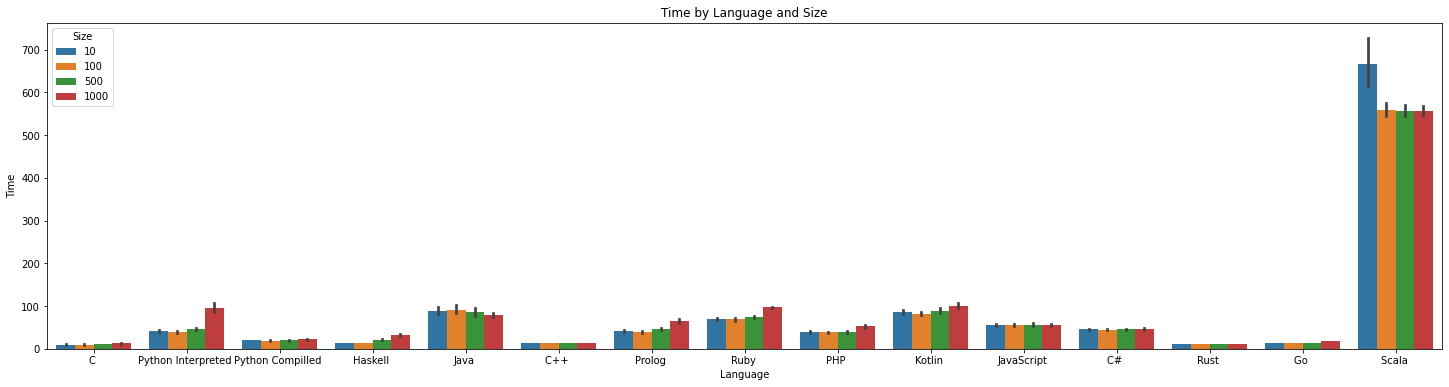

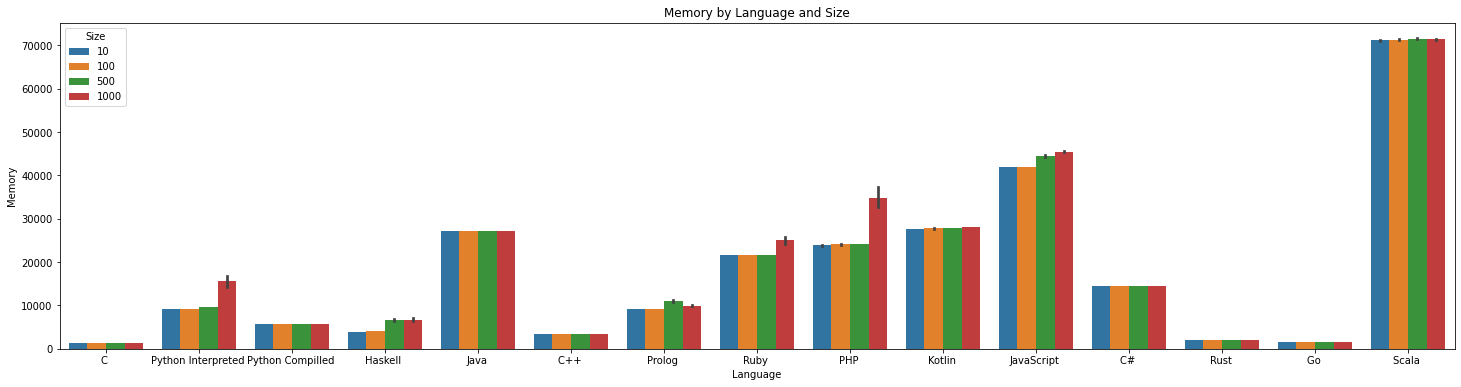

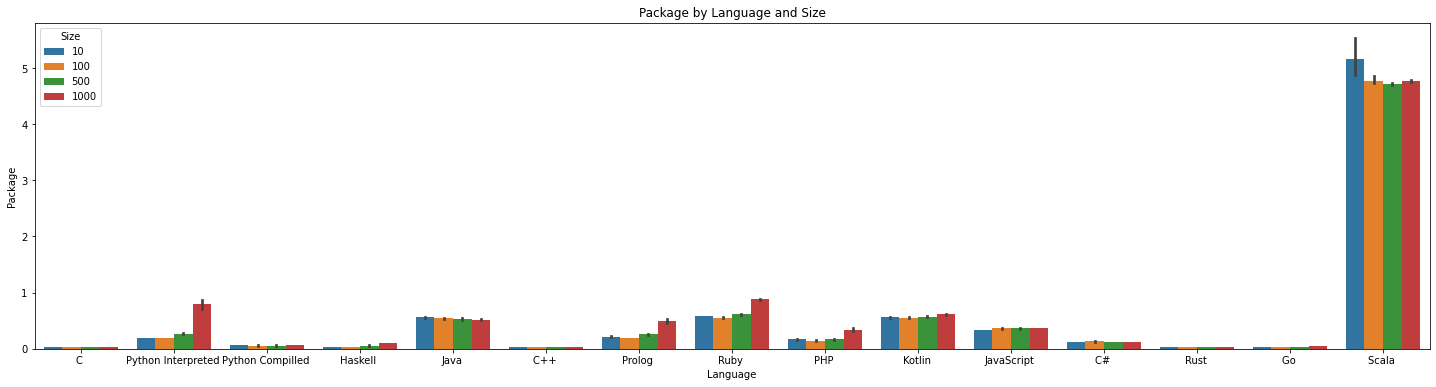

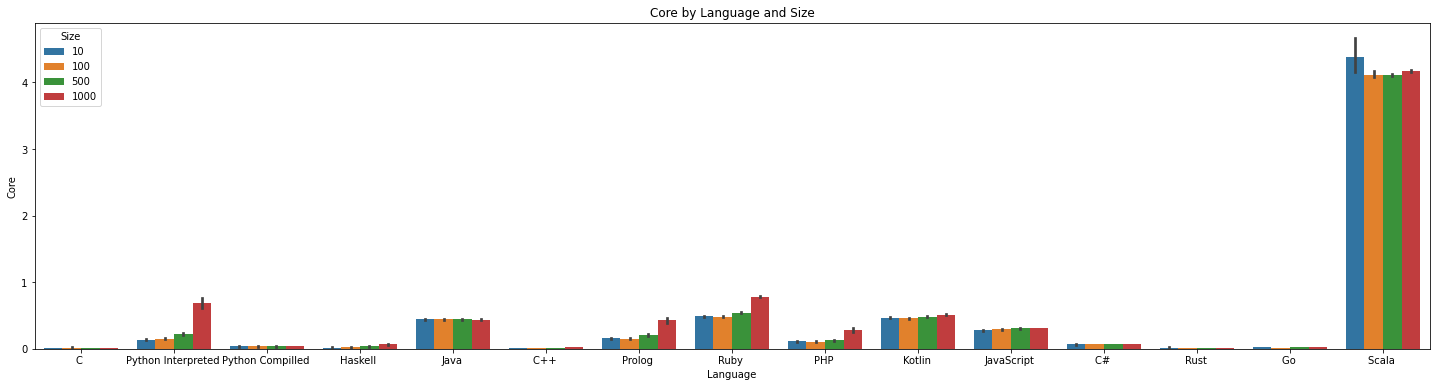

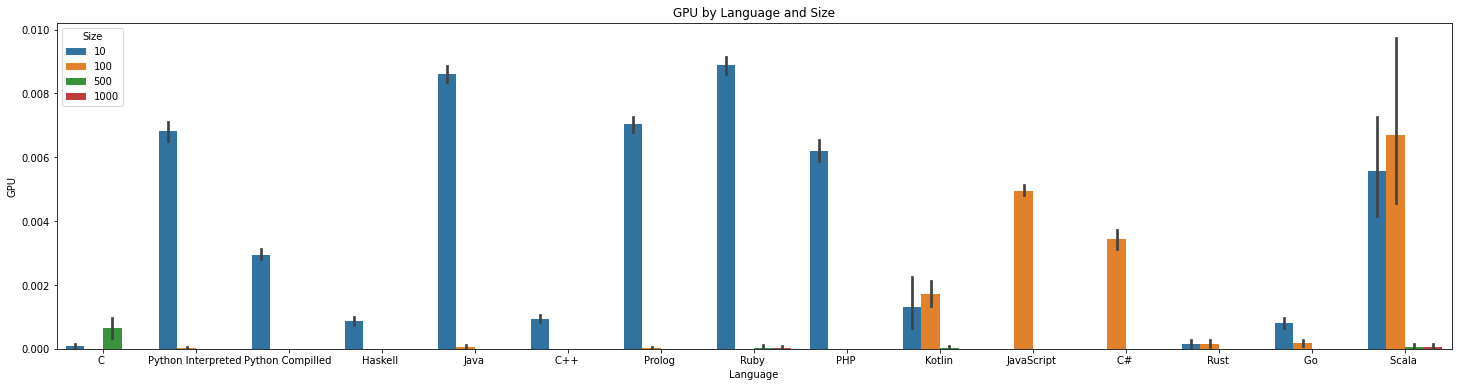

In [3]:
for col in ["Time", "Memory", "Package", "Core", "GPU"]:
    plt.figure(figsize=(25, 6))
    sea.barplot(data=df, x='Language', y=col, hue='Size')
    plt.xlabel('Language')
    plt.ylabel(f'{col}')
    plt.title(f'{col} by Language and Size')
    plt.legend(title='Size')
    plt.show()


c:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


[4.57191774e-04 1.40274663e-07 5.36380415e-07 3.01870057e-04]


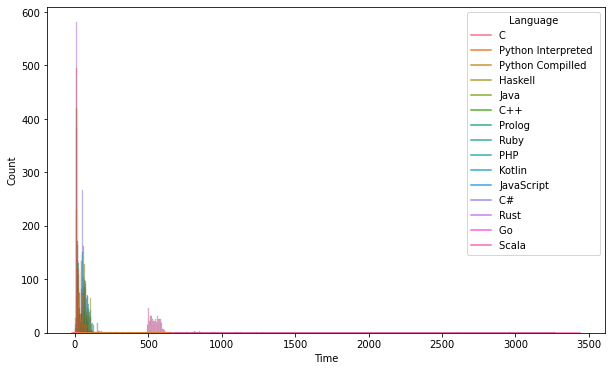

In [4]:
# Histogram and density estimation
from sklearn.neighbors import KernelDensity
import numpy as py

plt.figure(figsize=(10,6))
sea.histplot(data=df, hue='Language', x='Time')
# kernel density estimation for distr
sea.kdeplot(data=df, hue='Language', x='Time')

kde = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(df[['Core', 'Time']])
# exemplo de uma amostra de novos casos para estimar prob
novos = py.array([[0.15, 3.0], [1.222, 0.3], [1.004, 0.5], [0.10, 2.51]])

# log-likelihood (probability) density dos novos casos
log_dens = kde.score_samples(novos) 
print(py.exp(log_dens))

PearsonRResult(statistic=0.999199149053969, pvalue=0.0)
ro=0.9952016070595662  p=0.0
tau=0.9473011013616879  p=0.0


Text(0, 0.5, 'Core')

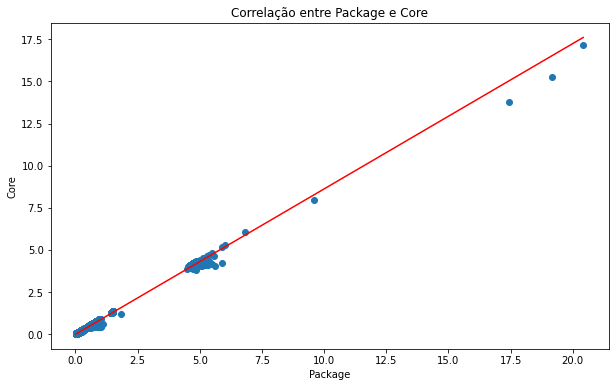

In [5]:
#  Pearson Corr Coef

p = stats.pearsonr(df['Package'], df['Core'])
"""Aqui pvalue é usado no sentido da prob de encontrar
 este resultado se de facto PearsonCorr fosse = 0.
 Se pvalue < 0.05 então a correlation é significativa
 """
print(p)

ro, pvalue1 = stats.spearmanr(df['Package'], df['Core'])
tau, pvalue2 = stats.kendalltau(df['Package'], df['Core'])
print("ro="+str(ro)  +"  p="+ str(pvalue1))
print("tau="+str(tau)+"  p="+str(pvalue2))

plt.figure(figsize=(10,6))
plt.title('Correlação entre Package e Core')
 
# plot the data
plt.scatter(df.Package, df["Core"])
 
# fits the best fitting line to the data
plt.plot(py.unique(df.Package),
         py.poly1d(py.polyfit(df.Package, df["Core"], 1))
         (py.unique(df.Package)), color='red')
 
# Labelling axes
plt.xlabel('Package')
plt.ylabel('Core')


<Axes: xlabel='Time', ylabel='Language'>

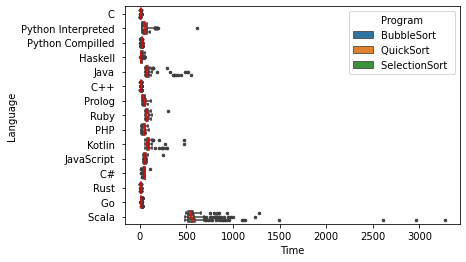

In [6]:
sea.boxplot(data=df,hue='Program',x='Time',y='Language',medianprops={"color":"red"},
            flierprops={"marker": "."},)

In [7]:
replace_map = {'Program': {
                    'BubbleSort':0 ,
                    'QuickSort': 1, 
                    'SelectionSort': 2
                    }}
df.replace(replace_map,inplace=True)

replace_map2 = {'Language': {
                    'C':0 ,
                    'Python Interpreted': 1, 
                    'Python Compilled': 2,
                    'Haskell':3,
                    'Java':4,
                    'C++':5,
                    'Prolog':6,
                    'Ruby':7,
                    'PHP':8,
                    'Kotlin':9,
                    'JavaScript':10,
                    'C#':11,
                    'Rust':12,
                    'Go':13,
                    'Scala':14
                    }}
df.replace(replace_map2,inplace=True)


Outliers e afins

number of outliers: 0 of 0 observations.
number of outliers: 0 of 0 observations.
number of outliers: 0 of 0 observations.
0


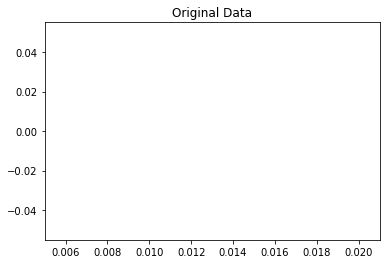

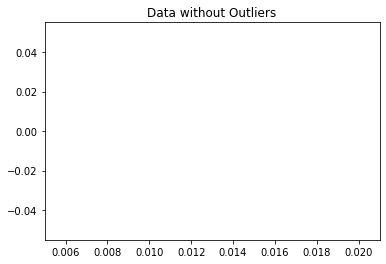

In [13]:
#TODO: Corrigir!


# remoção de outliers via as ideias incluidas nos boxplot
# IQR - Inter Quartil Range como expresso os gráficos acima

# Como a distribuição é desconhecida vamos usar o IQR.
# Com Gaussianas podiamos usar outras estrategias. Mas há vários métodos...
import seaborn as sns

def remove_outliers_quantile(data_series):
    data = data_series
    q75, q25 = data.quantile(q=0.75),data.quantile(q=0.25) # np.percentile(data.loc[:,data_column],[75,25])
    intr_qr = q75 - q25

    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)

    count_total = len(data)

    data = data[(data > min) & (data < max)]
    count_wo_outliers = len(data)

    outliers_count = count_total - count_wo_outliers
    print(f'number of outliers: {outliers_count} of {count_total} observations.')
    
    # remove outliers
    return data


# create a subset of your data
# define the data source and how to separate the data
data = df
data_column = 'Package'           # Atrib to compare
types_column_name = 'Language'    # The column name with the data in it
typeA = 'C'      # The category of data A
typeB = 'Haskell'     # The category of data B
typeC = 'Java'       # The category of data C




# create a new dataframe with the interesting subset 
df_sampleA = data[(data[types_column_name]==typeA)][data_column]
df_sampleB = data[(data[types_column_name]==typeB)][data_column]
df_sampleC = data[(data[types_column_name]==typeC)][data_column]



# create a new dataframe with the interesting subset 
sampleA = list(df_sampleA)
sampleB = list(df_sampleB)
sampleC = list(df_sampleC)


df_sampleA = remove_outliers_quantile(df_sampleA)
df_sampleB = remove_outliers_quantile(df_sampleB)
df_sampleC = remove_outliers_quantile(df_sampleC)

print(df_sampleA.count())
# plot 
sns.histplot(data=data[(data[types_column_name]==typeA)][data_column]).set(title='Original Data',xlim=(0.005,0.021))
plt.show()
sns.histplot(data=df_sampleA).set(title='Data without Outliers',xlim=(0.005,0.021))
plt.show()

Normality Check... Anderson-Darling e outros teste para verificar se amostra segue uma Gaussiana.

In [17]:
#TODO:Corrigir (depende da célula acima)

from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson

# seed the random number generator
seed(1)

# generate univariate observations
samples = [sampleA, sampleB, sampleC]

for data in samples:
    if len(data) > 0:
        # normality test
        result = anderson(data)
        #    H0: the sample has a Gaussian distribution.
        #    H1: the sample does not have a Gaussian distribution.

        # imprime valor da estatística do test
        # e depois a sequencia de valores criticos e alfas possíveis (significante values) 
        print('Statistic: %.3f' % result.statistic)
        p = 0
        for i in range(len(result.critical_values)):
            sl, cv = result.significance_level[i], result.critical_values[i]
            if result.statistic < result.critical_values[i]:
                print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
            else:
                print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
    else:
        print("Error: Empty data sample")


Error: Empty data sample
Error: Empty data sample
Error: Empty data sample


Calcular um empirical pvalue para um teste de médias entre o desempenho de dois algoritmos

In [19]:
# Teste A/B
import math
import random


# define the data source and how to separate the data 
# (which test is program A and which is program B)

data = df
data_column = 'Time'           # Atrib to compare
types_column_name = 'Program'    # The column name with the data in it
programA = 'C'     # The category of data A
programB = 'Python'  # The category of data B

repetitions_of_random_sampling = 1000

# create a new dataframe with the interesting subset 
data_set=data[(data[types_column_name]==programA) | (data[types_column_name]==programB)]
data_set.reset_index()

# count the number of samples in each data set 
count_A = data[data[types_column_name]==programA][types_column_name].count()
count_B = data[data[types_column_name]==programB][types_column_name].count()
org_mean_diff = data[data[types_column_name]==programA][data_column].mean() - data[data[types_column_name]==programB][data_column].mean()
if count_A != count_B: 
  print(f"Warning: The data original data sets do not have equally many elements: Data set A has {count_A} elements and Data set B has {count_B} elements") 

total = count_A + count_B
fact_r = math.factorial(total)

max_combinations = math.factorial(total) /(math.factorial(count_A) * math.factorial(total-count_A))
if max_combinations < repetitions_of_random_sampling: 
    print(f"Warning: The number of possible combinations when picking {count_A} elements from {total} elements is {max_combinations} and you have chosen {repetitions_of_random_sampling} repetitions, thus including some repetitions.")
                              
list_index = list(range(total))

# gerar samples (permutações) para medir diferença de médias!
mean_diffs = []
for i in range(repetitions_of_random_sampling):
    samples = random.sample(list_index,total)
    sampleA_index = samples[:count_A]
    sampleB_index = samples[count_A:]
    
    sampleA = data_set.iloc[sampleA_index]
    sampleB = data_set.iloc[sampleB_index]
    
    mean_diff = sampleA[data_column].mean()-sampleB[data_column].mean()
    mean_diffs.append(mean_diff)


empirical_p = py.count_nonzero(pd.Series(mean_diffs) <= org_mean_diff) / repetitions_of_random_sampling
print("empirical pvalue="+str(empirical_p))

# conclusion:
print(f"If the empirical p-value is 0 ,it means that none of the {repetitions_of_random_sampling} permuted samples "+
       f"resulted in a difference of {org_mean_diff} or lower. This is only an approximation. "+
       "The probability of getting a difference in that range is not 0, but it is very small,"+
       "according to our simulation. Therefore we can reject the null hypothesis.")







empirical pvalue=0.0
If the empirical p-value is 0 ,it means that none of the 1000 permuted samples resulted in a difference of nan or lower. This is only an approximation. The probability of getting a difference in that range is not 0, but it is very small,according to our simulation. Therefore we can reject the null hypothesis.


ValueError: autodetected range of [nan, nan] is not finite

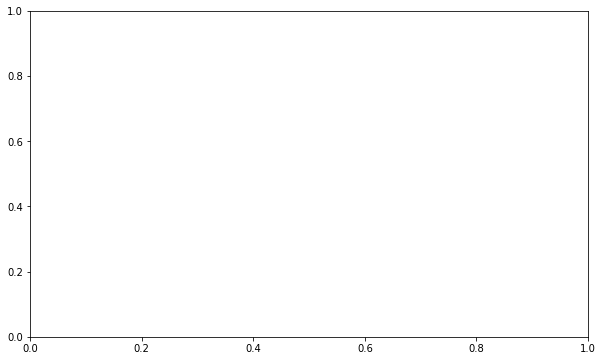

In [20]:
#TODO: Corrigir (depende das duas celulas acima)

# graphics for empirical pvalue difference distrib
# evaluate the histogram
fig, ax = plt.subplots(figsize=(10, 6))
values, base = py.histogram(mean_diffs, bins=40)
plt.plot(base[:-1], values, c='gray')
# a red line indicating the original difference between the averages of the original samples 
plt.axvline(x = org_mean_diff, color = 'red', label = 'difference between original samples')
plt.show()

In [21]:
# Wilcoxon
from scipy.stats import wilcoxon
x =  data[data[types_column_name]==programA][data_column][0:350]
y =  data[data[types_column_name]==programB][data_column][0:350]

# teste se mediana das difs é negativa ? (less)
res = wilcoxon(x,y,zero_method='wilcox',alternative='less',method='exact') 
print("W statistics="+str(res.statistic)+"  pvalue="+str(res.pvalue))
print()

# Mann Whitney U test  Less -->  A < B
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(x, y, method="exact",alternative="less")
print("U statistics="+str(U1)+"  pvalue="+str(p))


# KS gof test for continuous distribution 
ks, pvalue = stats.kstest(x, y, alternative="greater")
print("KS ="+str(ks)+"  pvalue="+str(pvalue))

W statistics=nan  pvalue=nan



ValueError: `x` and `y` must be of nonzero size.

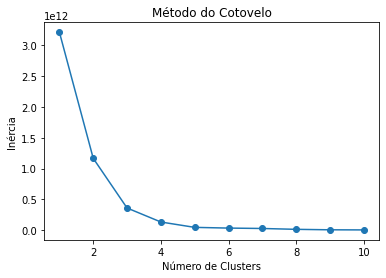

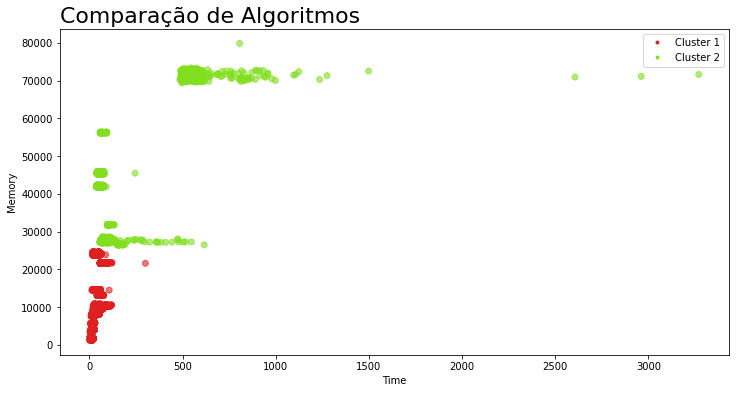

In [36]:
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D

file_name = '../measurements.csv'
df = pd.read_csv(file_name, header=0, delimiter=",", decimal=".")

# preprocessa categoricos com one hot encoding
df = pd.get_dummies(df, columns=["Language", "Program"])  

# Determinar o número ideal de clusters usando o método do cotovelo
inertias = []
max_clusters = 10  # Número máximo de clusters a serem testados
for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.plot(range(1, max_clusters+1), inertias, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

K_Clusters = 2  # Número ideal de clusters escolhido

# k-means
kmeans = KMeans(n_clusters=K_Clusters, random_state=0, n_init='auto')
# Obter clusters
df['cluster'] = kmeans.fit_predict(df)

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
# Adicionar os centróides ao dataframe
df['cen_x'] = df['cluster'].map(lambda x: cen_x[x])
df['cen_y'] = df['cluster'].map(lambda x: cen_y[x])
# Definir as cores dos clusters
colors = ['#DF2020', '#81DF20']
df['c'] = df['cluster'].map(lambda x: colors[x])

plt.figure(figsize=(12,6))
plt.scatter(df["Time"], df["Memory"], c=df.c, alpha=0.6)

# Criar a lista de elementos da legenda
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          label='Cluster {}'.format(i+1), 
                          markerfacecolor=mcolor, markersize=5) 
                   for i, mcolor in enumerate(colors)]

# Plotar a legenda
plt.legend(handles=legend_elements, loc='upper right')

# Título e rótulos dos eixos
plt.title('Comparação de Algoritmos', loc='left', fontsize=22)
plt.xlabel('Time')
plt.ylabel('Memory')

plt.show()
